In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bl
from reservoirpy.wellproductivitypy import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pvt_data = np.array([
[0, 0.01270, 1.000],
[400, 0.01286, 0.937],
[1200, 0.01530, 0.832],
[1600, 0.01680, 0.794],
[2000, 0.01840,0.770],
[3200, 0.02340, 0.797],
[3600, 0.02500,0.827],
[4000, 0.02660, 0.860]
])

pvt_pi=bl.pvt(pvt_data, columns=['pressure','mug','z'])
pvt_pi

,mug,z
pressure,,
0.0,0.01270,1.000
400.0,0.01286,0.937
1200.0,0.01530,0.832
1600.0,0.01680,0.794
2000.0,0.01840,0.770
3200.0,0.02340,0.797
3600.0,0.02500,0.827
4000.0,0.02660,0.860


J Gas: 0.00011248025127012314


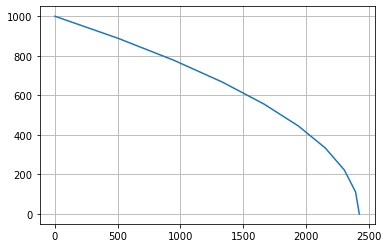

In [3]:
j_gas = pi.gas_j(h=6,k=100,re=1000,rw=0.75,temp=122,s=0)

print(f"J Gas: {j_gas}")

df,aof = pi.gas_inflow_curve(1000,3e-5,pvt_pi,n=10)

plt.plot(df['q'],df['p'])
plt.grid()

In [4]:
df

,p,q
0,0.000000,2424.668167
1,111.111111,2395.089216
2,222.222222,2305.488868
3,333.333333,2154.090070
4,444.444444,1940.286586
5,555.555556,1666.344203
6,666.666667,1334.647917
7,777.777778,945.970995
8,888.888889,500.931454
9,1000.000000,0.000000


In [5]:
g = bl.gas(pvt = pvt_pi, temp=122)

In [6]:
g_inflow = pi.gas_inflow(pr=1000,j=3.5e-6, gas=g)

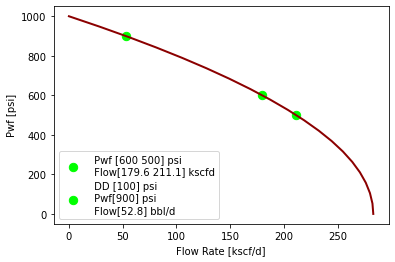

In [7]:
g_inflow.plot(pwf=[600,500],dd=100)
